In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt


In [2]:
env = gym.make('MountainCar-v0')


# Discretize the State Space
The state space in MountainCar-v0 is continuous, so you need to discretize it for Q-learning

In [3]:
# Define the number of buckets for discretization
n_buckets = (20, 20)  # For position and velocity
n_actions = env.action_space.n
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))

# Function to discretize a state
def discretize_state(state):
    ratios = [(state[i] - state_bounds[i][0]) / (state_bounds[i][1] - state_bounds[i][0]) for i in range(len(state))]
    new_state = [int(round((n_buckets[i] - 1) * ratios[i])) for i in range(len(state))]
    new_state = [min(n_buckets[i] - 1, max(0, new_state[i])) for i in range(len(state))]
    return tuple(new_state)


In [4]:
q_table = np.zeros(n_buckets + (n_actions,))


# Define Hyperparameters

In [5]:
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.99
min_epsilon = 0.01
episodes = 5000
max_steps = 200


# Q-Learning Algorithm


In [8]:
print(env.reset())


(array([-0.59250283,  0.        ], dtype=float32), {})


Episode: 100, Reward: -173.0, Epsilon: 0.01
Episode: 200, Reward: -128.0, Epsilon: 0.01
Episode: 300, Reward: -157.0, Epsilon: 0.01
Episode: 400, Reward: -200.0, Epsilon: 0.01
Episode: 500, Reward: -200.0, Epsilon: 0.01
Episode: 600, Reward: -175.0, Epsilon: 0.01
Episode: 700, Reward: -186.0, Epsilon: 0.01
Episode: 800, Reward: -200.0, Epsilon: 0.01
Episode: 900, Reward: -156.0, Epsilon: 0.01
Episode: 1000, Reward: -157.0, Epsilon: 0.01
Episode: 1100, Reward: -158.0, Epsilon: 0.01
Episode: 1200, Reward: -188.0, Epsilon: 0.01
Episode: 1300, Reward: -117.0, Epsilon: 0.01
Episode: 1400, Reward: -176.0, Epsilon: 0.01
Episode: 1500, Reward: -200.0, Epsilon: 0.01
Episode: 1600, Reward: -157.0, Epsilon: 0.01
Episode: 1700, Reward: -166.0, Epsilon: 0.01
Episode: 1800, Reward: -184.0, Epsilon: 0.01
Episode: 1900, Reward: -168.0, Epsilon: 0.01
Episode: 2000, Reward: -163.0, Epsilon: 0.01
Episode: 2100, Reward: -119.0, Epsilon: 0.01
Episode: 2200, Reward: -120.0, Epsilon: 0.01
Episode: 2300, Rewa

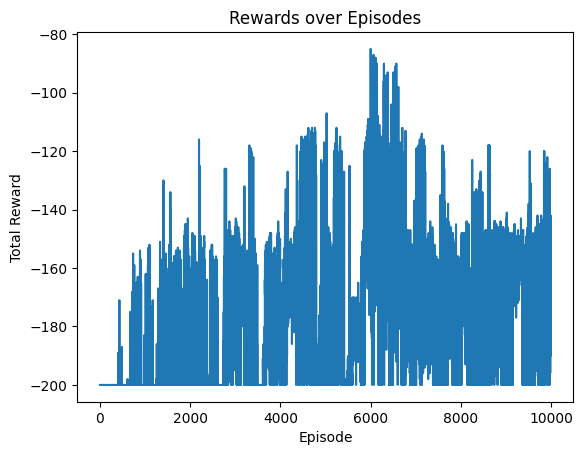

In [16]:
for episode in range(episodes):
    # Extract the state from the first element of the tuple
    state = discretize_state(env.reset()[0])
    total_reward = 0

    for step in range(max_steps):
        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Take action and observe the new state and reward
        next_step = env.step(action)
        next_state = discretize_state(next_step[0])  # Extract state from next_step tuple
        reward = next_step[1]
        done = next_step[2]
        total_reward += reward

        # Update Q-value using the Bellman equation
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + discount_factor * q_table[next_state][best_next_action]
        td_error = td_target - q_table[state][action]
        q_table[state][action] += learning_rate * td_error

        state = next_state

        if done:
            break

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    rewards.append(total_reward)

    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}, Reward: {total_reward}, Epsilon: {epsilon:.2f}")

        # Plot rewards
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes')
plt.show()

# Test the Agent

In [17]:
# Test the Agent
state = discretize_state(env.reset()[0])  # Extract the state array
done = False
while not done:
    env.render()
    action = np.argmax(q_table[state])  # Choose the best action from Q-table
    next_step = env.step(action)        # Perform the action
    state = discretize_state(next_step[0])  # Extract and discretize the next state
    done = next_step[2]  # Check if the episode is done
env.close()


In [14]:
pip install --upgrade numpy gym


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\varun\\anaconda3\\Lib\\site-packages\\~1mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/1e/48/a9a4b538e28f854bfb62e1dea3c8fea12e90216a276c7777ae5345ff29a7/numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 330.3 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 262.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 281.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 324.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.9 MB 919.0 kB/s eta 0:00:14
   ---------------------------------------- 0.1/12.9 MB 751.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/12.9 MB 722.1 kB/s eta 0:00:18
   -----------------------